In [89]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [90]:
df = pd.read_csv("Live_20210128.csv")
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [91]:
df.dtypes

status_id             int64
status_type          object
status_published     object
num_reactions         int64
num_comments          int64
num_shares            int64
num_likes             int64
num_loves             int64
num_wows              int64
num_hahas             int64
num_sads              int64
num_angrys            int64
Column1             float64
Column2             float64
Column3             float64
Column4             float64
dtype: object

In [92]:
df['status_published'] =  pd.to_datetime(df['status_published'], format='%m/%d/%Y %H:%M')

In [93]:
df.dtypes

status_id                    int64
status_type                 object
status_published    datetime64[ns]
num_reactions                int64
num_comments                 int64
num_shares                   int64
num_likes                    int64
num_loves                    int64
num_wows                     int64
num_hahas                    int64
num_sads                     int64
num_angrys                   int64
Column1                    float64
Column2                    float64
Column3                    float64
Column4                    float64
dtype: object

In [94]:
first_date = min(df['status_published'])

In [95]:
first_date

Timestamp('2012-07-15 02:51:00')

In [96]:
df['status_published'] = (df['status_published'] - first_date)
df['status_published'] = df['status_published'].dt.total_seconds()/(24*3600) 

status = pd.get_dummies(df['status_type'],drop_first=True)
df = pd.concat([df, status], axis=1)
df = df.drop(['status_type'], axis=1)
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace=True)

In [97]:
df.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,photo,status,video
0,1,2107.131250,529,512,262,432,92,3,1,1,0,0,0,1
1,2,2106.829167,150,0,0,150,0,0,0,0,0,1,0,0
2,3,2106.143056,227,236,57,204,21,1,1,0,0,0,0,1
3,4,2105.984722,111,0,0,111,0,0,0,0,0,1,0,0
4,5,2103.021528,213,0,0,204,9,0,0,0,0,1,0,0


In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)

pd.DataFrame(df).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03,7.050000e+03
mean,4.960571e-17,-1.395212e-15,6.572520e-16,9.976811e-16,-1.043607e-14,-1.290260e-15,9.370952e-15,-2.702897e-15,3.198364e-15,-3.898639e-15,-2.798234e-15,7.781325e-16,2.641811e-15,-1.294599e-15
std,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.731805e+00,-2.295817e+00,-4.974511e-01,-2.522062e-01,-3.041444e-01,-4.784685e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01,-1.245993e+00,-2.336661e-01,-7.034991e-01
25%,-8.659026e-01,-3.604809e-01,-4.607017e-01,-2.522062e-01,-3.041444e-01,-4.406437e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01,-1.245993e+00,-2.336661e-01,-7.034991e-01
50%,0.000000e+00,5.242007e-01,-3.688282e-01,-2.477097e-01,-3.041444e-01,-3.494192e-01,-3.184544e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01,8.025728e-01,-2.336661e-01,-7.034991e-01
75%,8.659026e-01,6.848141e-01,-2.403230e-02,-2.263511e-01,-2.737471e-01,-6.740185e-02,-2.433983e-01,-1.478790e-01,-1.760099e-01,-1.525870e-01,-1.557480e-01,8.025728e-01,-2.336661e-01,1.421466e+00
max,1.731805e+00,8.232524e-01,9.684296e+00,2.334336e+01,2.571594e+01,1.000123e+01,1.611883e+01,3.173639e+01,3.950149e+01,3.178144e+01,4.249930e+01,8.025728e-01,4.279611e+00,1.421466e+00


In [99]:
kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(df)
kmeans.inertia_

81931.25628692178

Text(0, 0.5, 'Inertia')

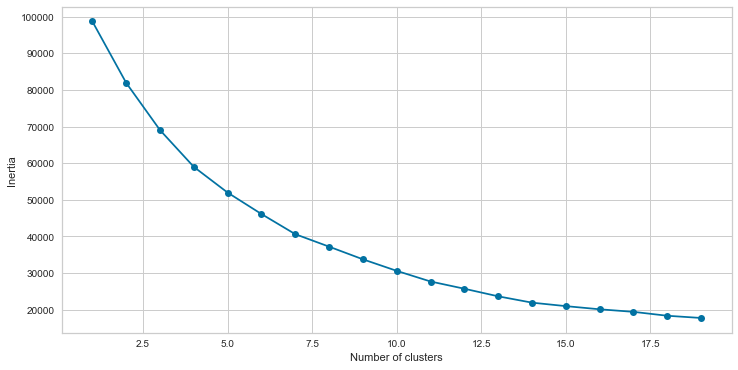

In [100]:
score = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(df)
    score.append(kmeans.inertia_)

df_clustered = pd.DataFrame({'Cluster':range(1,20), 'score':score})
plt.figure(figsize=(12,6))
plt.plot(df_clustered['Cluster'], df_clustered['score'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

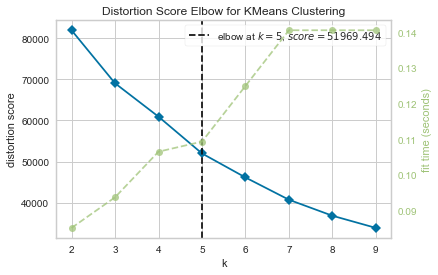

In [101]:
from yellowbrick.cluster.elbow import kelbow_visualizer
elbow = kelbow_visualizer(KMeans(random_state=4), df, k=(2,10))

In [102]:
kmeans = KMeans(n_clusters = 5, init='k-means++')
kmeans.fit(df)
pred = kmeans.predict(df)
df_clustered = pd.DataFrame(df)
df_clustered['cluster'] = pred
df_clustered['cluster'].value_counts()

1    4119
4    2080
3     338
0     311
2     202
Name: cluster, dtype: int64